
#  Investigate a Dataset (The Movie Database (TMDb))


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
> In this project we are going to investigate a very popular database in relation with the world of the movie, it's the data set that contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue, I know it's very execting data set to get some information from.

In [1]:
#imports
import pandas as pd
import numpy as np
from scipy.integrate import quad
import seaborn as sns
import matplotlib.pyplot as plt


sns.set_style('whitegrid')
%matplotlib inline




<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [2]:
#loading the data from the csv file
df = pd.read_csv('tmdb-movies.csv')
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [3]:
# Informations about the data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

pandas.core.frame.DataFrame

In [9]:
# a function to print the data types in a nice tabular format using Stirng.format function
def getdataFramTypesFormater(df:pd.DataFrame):  
    print("{:<25} {:<20}\n".format("Attibut","Data type"))

    for col in df.columns:
        print("{:<25} {:<20}".format(col,str(type(df[col][0])).split("'")[1]))
        
getdataFramTypesFormater(df)

Attibut                   Data type           

id                        numpy.int64         
imdb_id                   str                 
popularity                numpy.float64       
budget                    numpy.int64         
revenue                   numpy.int64         
original_title            str                 
cast                      str                 
homepage                  str                 
director                  str                 
tagline                   str                 
keywords                  str                 
overview                  str                 
runtime                   numpy.int64         
genres                    str                 
production_companies      str                 
release_date              str                 
vote_count                numpy.int64         
vote_average              numpy.float64       
release_year              numpy.int64         
budget_adj                numpy.float64       
revenue_adj 




### Data Cleaning 

we have some attributs in our data that we are not going to use

In [10]:
#drop the column that we are not going to use
df.drop(['id','imdb_id','cast','homepage','tagline','keywords','overview','genres','production_companies'],axis=1,inplace=True)


 previously we saw that there is some missing value in the data

In [11]:
# we test if the isnull conditon is False then there is not null value in that row so we keep it
df=df[df.isnull().any(axis=1)==False]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10822 entries, 0 to 10865
Data columns (total 12 columns):
popularity        10822 non-null float64
budget            10822 non-null int64
revenue           10822 non-null int64
original_title    10822 non-null object
director          10822 non-null object
runtime           10822 non-null int64
release_date      10822 non-null object
vote_count        10822 non-null int64
vote_average      10822 non-null float64
release_year      10822 non-null int64
budget_adj        10822 non-null float64
revenue_adj       10822 non-null float64
dtypes: float64(4), int64(5), object(3)
memory usage: 1.1+ MB


now we the distribution of the attributs in the data

In [13]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10822.000000,1.082200e+04,1.082200e+04,10822.000000,10822.000000,10822.000000,10822.000000,1.082200e+04,1.082200e+04
mean,0.648525,1.468400e+07,3.998422e+07,102.129366,218.201811,5.971419,2001.295694,1.762126e+07,5.157217e+07
std,1.001657,3.096237e+07,1.172138e+08,30.871482,576.646675,0.933675,12.819367,3.435805e+07,1.448894e+08
min,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.209038,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.385161,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.716278,1.530000e+07,2.431464e+07,111.000000,146.000000,6.600000,2011.000000,2.099042e+07,3.397891e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


there is some rows with budget or revenue with 0 value

In [14]:
# drop all the row where the revenue or the budget is lass or equel to 0
df = df[df.revenue>0]
df = df[df.budget>0]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 12 columns):
popularity        3854 non-null float64
budget            3854 non-null int64
revenue           3854 non-null int64
original_title    3854 non-null object
director          3854 non-null object
runtime           3854 non-null int64
release_date      3854 non-null object
vote_count        3854 non-null int64
vote_average      3854 non-null float64
release_year      3854 non-null int64
budget_adj        3854 non-null float64
revenue_adj       3854 non-null float64
dtypes: float64(4), int64(5), object(3)
memory usage: 391.4+ KB


 now the data is ready for the analysis

<a id='eda'></a>
## Exploratory Data Analysis


### Question 1  how much the film industry did grow in the past 50 years ?


In [15]:
#group all the budget for every movie for by year
df_budget =df.groupby('release_year')['budget'].agg({'budget':sum})
#group all the revenue for every movie for by year
df_revenue=df.groupby('release_year')['revenue'].agg({'revenue':sum})



C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  after removing the cwd from sys.path.


we find the diffrence between the revenue and the budget spent on the movie the have the net revenue

In [16]:
#get the diffrence between the revenue and the budget
diffrence = (df_revenue['revenue']-df_budget['budget']) 


In [17]:
plt.figure(figsize=(6.4, 6.4))

<Figure size 460.8x460.8 with 0 Axes>

<Figure size 460.8x460.8 with 0 Axes>

we want to see the relationship between tow continues variable so the appropriate plot to use is a line chart 

No handles with labels found to put in legend.


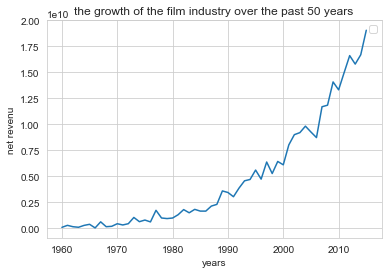

In [18]:
#plot the result
plt.plot(np.array(diffrence.keys()), diffrence.values)
plt.xlabel('years')
plt.ylabel('net revenu')
plt.legend()
plt.title("the growth of the film industry over the past 50 years")
plt.show()

###  Question 2  is there any corelation between film budget and   the rating?

for this question we are going to  do some data discretization to have more precise rate categorie

we plot a histogram to see the distribution of the data to have more information about how much bins the distribution needs for the discretization

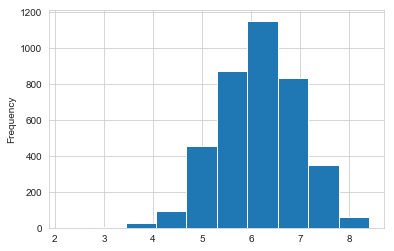

In [19]:
df["vote_average"].plot(kind="hist")

In [20]:
df["vote_average"].describe()

count    3854.000000
mean        6.167955
std         0.795121
min         2.200000
25%         5.700000
50%         6.200000
75%         6.700000
max         8.400000
Name: vote_average, dtype: float64

In [21]:
# we are going to devide the vote_average attribut into 5 class the lowst 20% then the next one ....
bin_labels_5 = ['bad', 'okay', 'good', 'fantastic', 'masterpiece']
df['vote_average_desct'] = pd.qcut(df['vote_average'],
                              q=[0, .2, .4, .6, .8, 1],
                              labels=bin_labels_5)

In [22]:
#group the data by the new attribut vote_average_desct and calculat the mean of the budget_adj
result = df.groupby("vote_average_desct")['budget_adj'].mean()

we want to see the relationship between two variables, one is a nominal variable and the other one is a continuous variable, so the appropriate chart is a bar chart.

<BarContainer object of 5 artists>

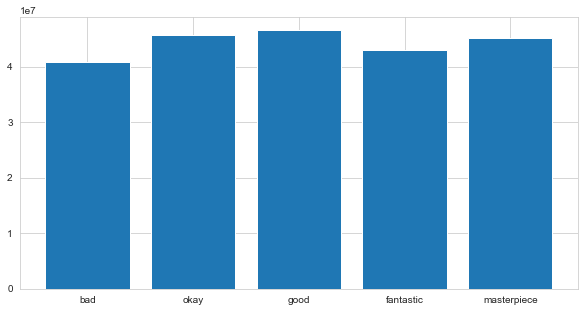

In [23]:
plt.figure(figsize=(10,5))
plt.bar(np.array(result.keys()),result.values)

###  Question 3  is there any corelation between film budget and   the revenu?


In [25]:
# deviding dataset into the top  25% in terms of revenue and the next 75%

df_high_revenu = df[df.revenue >= df.revenue.describe()['75%']]
df_low_revenu  = df[df.revenue < df.revenue.describe()['75%']]

we want to see the relationship between two variables, one is a nominal variable and the other one is a continuous variable, so the appropriate chart is a bar chart.

No handles with labels found to put in legend.


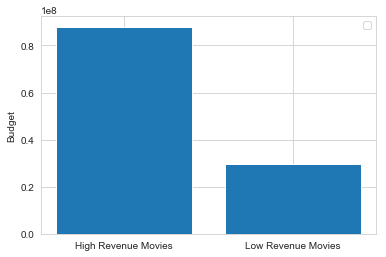

In [26]:
x = ['High Revenue Movies', 'Low Revenue Movies']
y = [df_high_revenu.budget_adj.mean(), df_low_revenu.budget_adj.mean()]
plt.ylabel('Budget')
plt.bar(x,y)
plt.legend()


<a id='conclusions'></a>
## Conclusions

- we can see that the film industry did grow exponentially every decade and that's a fact, because of all the advancements in technologies in the movie making and the media that allow the producer to make a movie more easily and allow the audience to access more and more films.
- we can also see that the budget of the film don't affect that much his rating, so the idea, scenario and the story play a key roll in the success of a film.
- in the other hand, we see that the budget of the film affect hist revenue and we can explain that (a film with a higher budget can do more advertising in a top TV channel and the biggest city in the words, promotion tours, all of that can make more money).
